In [ ]:
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy as sp
from pylab import *
from networkx.drawing.nx_pydot import graphviz_layout
from networkx.algorithms import bipartite
import random as rd
from collections import Counter
import pylab 
import scipy.stats as stats
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.signal import savgol_filter


warnings.filterwarnings('ignore')

%matplotlib inline



## CTS1 Beta-estradiol titration

In [26]:
cd /Users/piyushnanda/Documents/PhD_MurrayLab/EMC/Data/ePN001/

/Users/piyushnanda/Documents/PhD_MurrayLab/EMC/Data/ePN001


In [27]:
ls

CTS1_0.csv*  CTS1_4.csv*  CTS2_0.csv*  CTS2_4.csv*  ePN001_ACE2/
CTS1_10.csv* CTS1_6.csv*  CTS2_10.csv* CTS2_6.csv*
CTS1_2.csv*  CTS1_8.csv*  CTS2_2.csv*  CTS2_8.csv*


In [7]:
files=sorted(os.listdir())
counts=[]
count_data=pd.DataFrame()

for f in files:
    if('CTS' in f and 'growth' not in f):
        df=pd.read_csv(f)['cell_counts']
        df.name=f[3:f.index('.csv')]
        count_data=pd.concat([count_data,df],axis=1)


In [8]:
count_data.columns=['0_1','10_1','2_1','4_1','6_1','8_1','0_2','10_2','2_2','4_2','6_2','8_2']

In [9]:
count_data.describe()

,0_1,10_1,2_1,4_1,6_1,8_1,0_2,10_2,2_2,4_2,6_2,8_2
count,396.000000,298.000000,298.000000,400.000000,379.000000,377.000000,280.000000,524.000000,327.000000,415.000000,398.000000,467.000000
mean,2.830808,1.637584,2.761745,2.437500,2.303430,1.952255,2.896429,1.509542,2.859327,2.462651,2.246231,1.880086
std,1.637893,0.740505,1.463454,1.144276,1.150231,0.903805,1.581701,0.661640,1.522358,1.292090,1.155285,0.897403
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,2.000000,1.750000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000
50%,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000,1.000000,3.000000,2.000000,2.000000,2.000000
75%,4.000000,2.000000,4.000000,3.000000,3.000000,2.000000,4.000000,2.000000,4.000000,3.000000,3.000000,2.000000
max,10.000000,5.000000,8.000000,6.000000,8.000000,7.000000,8.000000,5.000000,9.000000,7.000000,10.000000,7.000000


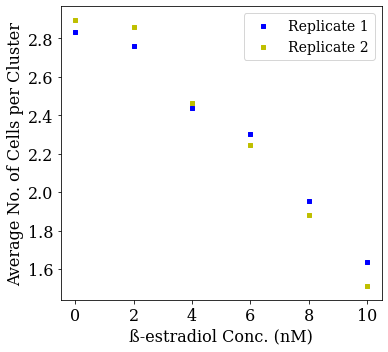

In [13]:
plt.rc('font',family='serif')
plt.figure(figsize=(5.5,5))
plt.scatter([0,10,2,4,6,8],count_data.mean()[0:6],s=20,marker='s',color='b')
plt.scatter([0,10,2,4,6,8],count_data.mean()[6:12],s=20,marker='s',color='y')
plt.xlabel('ß-estradiol Conc. (nM)',fontsize=16)
plt.ylabel('Average No. of Cells per Cluster',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(['Replicate 1','Replicate 2'],fontsize=14)
plt.tight_layout()

plt.savefig('/Users/piyushnanda/Documents/PhD_MurrayLab/EMC/Figures/Final/cts1_mean_vs_be.jpg',dpi=600)



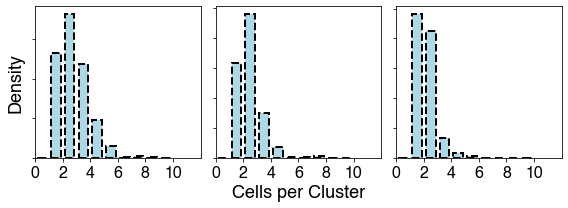

In [11]:
plt.rc('font',family='helvetica')


fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(8,3))

labels=['2_1','4_1','6_1','8_1','10_1','2_2','4_2','6_2','8_2','10_2']
concs=['2 nM','4 nM','6 nM','8 nM','10 nM']
means=[]
var=[]
std=[]
skew=[]
for i in range(0,3):
    ax[i].hist(count_data[labels[i+2]],density=True,bins=[0,1,2,3,4,5,6,7,8,9,10],color='lightblue',rwidth=0.7,align='mid',edgecolor='black',linewidth=2.0,linestyle='--')
#     ax[i].set_title(concs[int(i%5)],fontsize=16)
    means.append(count_data[labels[i]].mean())
    std.append(count_data[labels[i]].std())
    var.append(count_data[labels[i]].var())
    skew.append(count_data[labels[i]].mode())
    ax[i].set_xlim(0,12)
    ax[i].set_xticks(np.arange(0,11,2))
    ax[i].set_xticklabels(labels=[0,2,4,6,8,10],fontsize=16)
    ax[i].set_yticklabels([])


ax[0].set_ylabel('Density',fontsize=18)
ax[1].set_xlabel('Cells per Cluster',fontsize=18)
fig.tight_layout()
    
fig.savefig('/Users/piyushnanda/Documents/PhD_MurrayLab/EMC/Figures/Final/ß-estradiol_CTS1_final_rep1_thin.jpg',dpi=600)

In [18]:
lin_conc=np.array(means[0:10]).reshape(-1,1)
lin_size=np.array(std[0:10]).reshape(-1,1)
lreg=LinearRegression().fit(lin_conc,lin_size)
m1=lreg.coef_
c1=lreg.intercept_
Ypred=lreg.predict(lin_conc)
r2=r2_score(lin_size,Ypred)

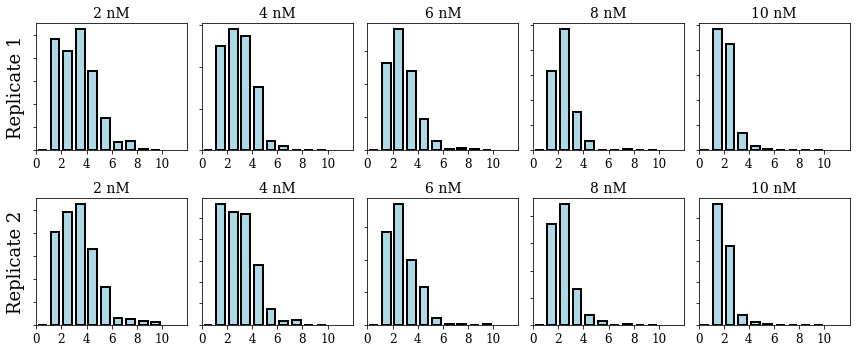

In [17]:
plt.rc('font',family='serif')


fig,ax=plt.subplots(nrows=2,ncols=5,figsize=(12,5))

labels=['2_1','4_1','6_1','8_1','10_1','2_2','4_2','6_2','8_2','10_2']
concs=['2 nM','4 nM','6 nM','8 nM','10 nM']
means=[]
var=[]
std=[]
skew=[]
for i in range(10):
    ax[int(i/5),int(i%5)].hist(count_data[labels[i]],density=True,bins=[0,1,2,3,4,5,6,7,8,9,10],color='lightblue',rwidth=0.7,align='mid',edgecolor='black',linewidth=2.0)
    ax[int(i/5),int(i%5)].set_title(concs[int(i%5)],fontsize=14)
    means.append(count_data[labels[i]].mean())
    std.append(count_data[labels[i]].std())
    var.append(count_data[labels[i]].var())
    skew.append(count_data[labels[i]].mode())
    ax[int(i/5),int(i%5)].set_xlim(0,12)
    ax[int(i/5),int(i%5)].set_xticks(np.arange(0,11,2))
    ax[int(i/5),int(i%5)].set_xticklabels(labels=[0,2,4,6,8,10],fontsize=12)
    ax[int(i/5),int(i%5)].set_yticklabels([])


ax[0,0].set_ylabel('Replicate 1',fontsize=18)
ax[1,0].set_ylabel('Replicate 2',fontsize=18)
fig.tight_layout()
    
# fig.savefig('/Users/piyushnanda/Documents/PhD_MurrayLab/EMC/Figures/Final/ß-estradiol_CTS1.jpg',dpi=600)

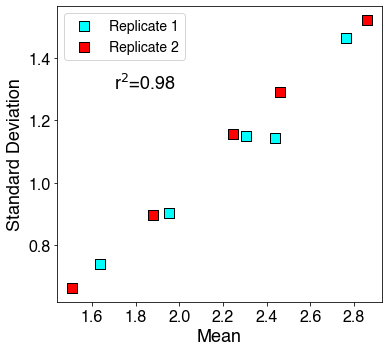

In [21]:
plt.rc('font',family='helvetica')
plt.figure(figsize=(5.5,5))
# plt.scatter(means[0:5],var[0:5],marker='+',s=100,color='black')
# plt.scatter(means[5:10],var[5:10],marker='+',s=100,color='blue')
plt.scatter(means[0:5],std[0:5],marker='s',s=100,color='cyan',linewidth=1,edgecolor='black')
plt.scatter(means[5:10],std[5:10],marker='s',s=100,color='red',linewidth=1,edgecolor='black')
# plt.plot([1,3],[1,3])
plt.xlabel('Mean',fontsize=18)
plt.ylabel('Standard Deviation',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(['Replicate 1','Replicate 2'],fontsize=14)
# plt.xlim(1.25,3)
# plt.ylim(1.25,3)
plt.text(1.7,1.3,'r$^{2}$='+str(r2)[0:4],fontsize=18)
plt.tight_layout()

plt.savefig('/Users/piyushnanda/Documents/PhD_MurrayLab/EMC/Figures/Final/mean_vs_std_cts_fin.jpg',dpi=600)

In [123]:
mean=[]
std=[]
for i in range(140,280):
    er_rv=erlang.rvs(i/100,size=200)
    mean.append(er_rv.mean())
    std.append(er_rv.std())

lin_conc=np.array(mean).reshape(-1,1)
lin_size=np.array(std).reshape(-1,1)
lreg=LinearRegression().fit(lin_conc,lin_size)
m1=lreg.coef_
c1=lreg.intercept_
Ypred=lreg.predict(lin_conc)
r2=r2_score(lin_size,Ypred)
    

[[2.5338917]]
0.7098833193562498


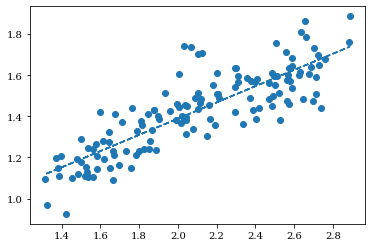

In [124]:
plt.scatter(mean,std)
plt.plot(mean,Ypred,'--')
print(1/m1)
print(r2)

In [154]:
(1/m1)**2

array([[2.48678932]])

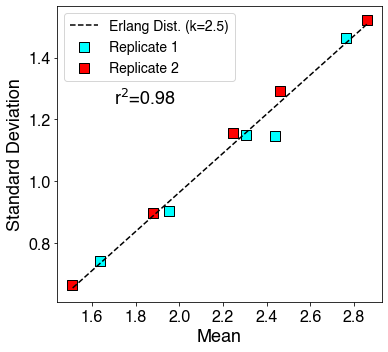

In [24]:
lin_conc=np.array(means).reshape(-1,1)
lin_size=np.array(std).reshape(-1,1)
lreg=LinearRegression().fit(lin_conc,lin_size)
m1=lreg.coef_
c1=lreg.intercept_
Ypred=lreg.predict(lin_conc)
r2=r2_score(lin_size,Ypred)


plt.rc('font',family='helvetica')
plt.figure(figsize=(5.5,5))
# plt.scatter(means[0:5],var[0:5],marker='+',s=100,color='black')
# plt.scatter(means[5:10],var[5:10],marker='+',s=100,color='blue')
plt.scatter(means[0:5],std[0:5],marker='s',s=100,color='cyan',linewidth=1,edgecolor='black',label='Replicate 1')
plt.scatter(means[5:10],std[5:10],marker='s',s=100,color='red',linewidth=1,edgecolor='black',label='Replicate 2')
plt.legend(fontsize=14)
plt.plot(means[5:10],Ypred[5:10],'--',color='black',label='Erlang Dist. (k=2.5)')
plt.legend(fontsize=14)
# plt.plot([1,3],[1,3])
plt.xlabel('Mean',fontsize=18)
plt.ylabel('Standard Deviation',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
# plt.xlim(1.25,3)
# plt.ylim(1.25,3)
plt.text(1.7,1.25,'r$^{2}$='+str(r2)[0:4],fontsize=18)
plt.tight_layout()

plt.savefig('/Users/piyushnanda/Documents/PhD_MurrayLab/EMC/Figures/Final/mean_vs_std_cts_fin_wEr.jpg',dpi=600)

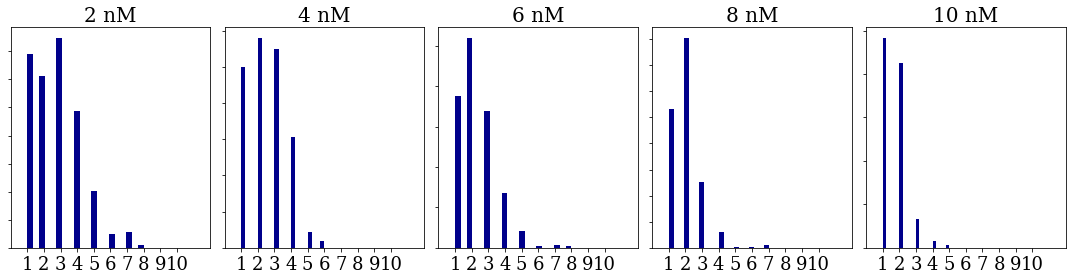

In [42]:
plt.rc('font',family='serif')
fig,ax=plt.subplots(nrows=1,ncols=5,figsize=(15,4))

labels=['2_1','4_1','6_1','8_1','10_1','2_2','4_2','6_2','8_2','10_2']
concs=['2 nM','4 nM','6 nM','8 nM','10 nM']
means=[]
var=[]
std=[]
skew=[]
for i in range(5):
    ax[i].hist(count_data[labels[i]],density=True,bins=20,color='darkblue')
    ax[i].set_title(concs[int(i)],fontsize=20)
    means.append(count_data[labels[i]].mean())
    std.append(count_data[labels[i]].std()*np.sqrt(5))
    var.append(count_data[labels[i]].var())
    skew.append(count_data[labels[i]].mode())
    ax[i].set_xlim(0,12)
    ax[i].set_xticks([1,2,3,4,5,6,7,8,9,10])
    ax[i].set_xticklabels([1,2,3,4,5,6,7,8,9,10],fontsize=18)
    ax[i].set_yticklabels([])


# ax[0].set_ylabel('cts1∆',fontsize=20)
fig.tight_layout()
    
fig.savefig('/Users/piyushnanda/Documents/PhD_MurrayLab/EMC/Figures/ß-estradiol_CTS1_Final.jpg',dpi=600)

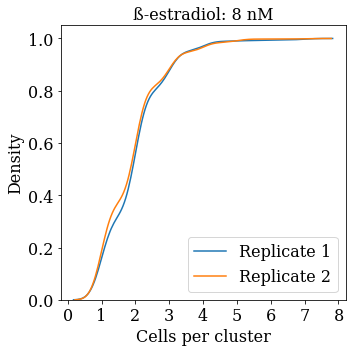

In [35]:
plt.rc('font',family='serif')
plt.figure(figsize=(5,5))
sns.kdeplot(count_data['8_1'],cumulative=True)
sns.kdeplot(count_data['8_2'],cumulative=True)
plt.xlabel('Cells per cluster',fontsize=16)
plt.ylabel('Density',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(['Replicate 1','Replicate 2'],fontsize=16)
plt.title('ß-estradiol: 8 nM',fontsize=16)
plt.tight_layout()
plt.savefig('/Users/piyushnanda/Documents/PhD_MurrayLab/EMC/Figures/Final/Replicate_Const_CTS1_8.jpg',dpi=600)

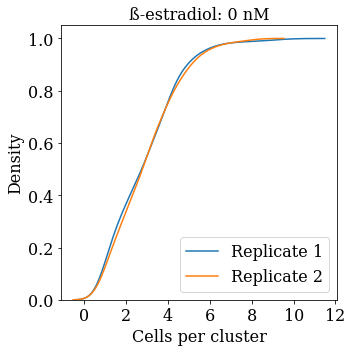

In [36]:
plt.rc('font',family='serif')
plt.figure(figsize=(5,5))
sns.kdeplot(count_data['0_1'],cumulative=True)
sns.kdeplot(count_data['0_2'],cumulative=True)
plt.xlabel('Cells per cluster',fontsize=16)
plt.ylabel('Density',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(['Replicate 1','Replicate 2'],fontsize=16)
plt.title('ß-estradiol: 0 nM',fontsize=16)
plt.tight_layout()
plt.savefig('/Users/piyushnanda/Documents/PhD_MurrayLab/EMC/Figures/Final/Replicate_Const_CTS1_0.jpg',dpi=600)